In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(
            "datasets/household_data_1min.csv",
            infer_datetime_format=True,
            index_col="utc_timestamp",
            parse_dates=["utc_timestamp"],
        ).drop("cet_cest_timestamp", axis=1)

target_col = [col for col in data.columns if "grid_import" in col]
data = data[target_col]

/tmp/ipykernel_31388/3744189380.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(
/tmp/ipykernel_31388/3744189380.py:4: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


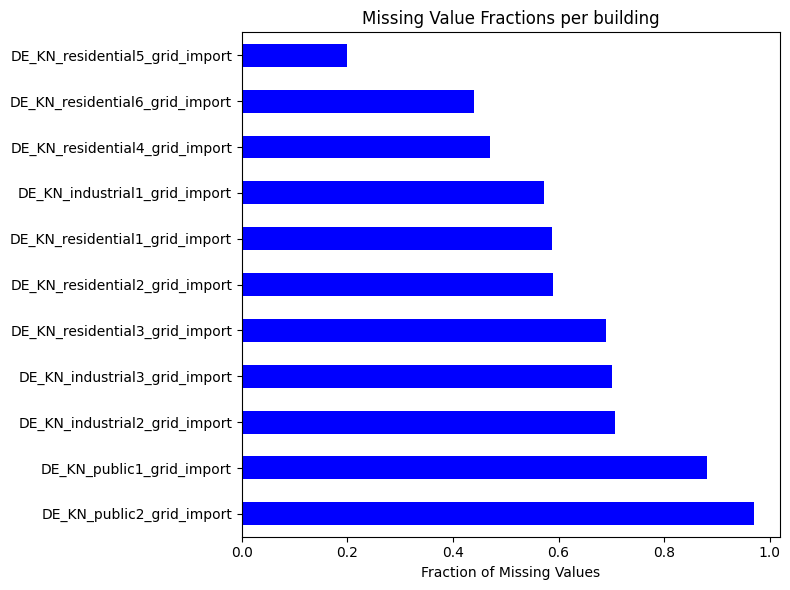

In [20]:
# Missing data

missing = data.isna().mean().sort_values(ascending=False)

missing.plot(kind="barh", figsize=(8, 6), color="blue")
plt.xlabel("Fraction of Missing Values")
plt.title("Missing Value Fractions per building")
plt.tight_layout()
plt.savefig("maxwell_missing")
plt.show()

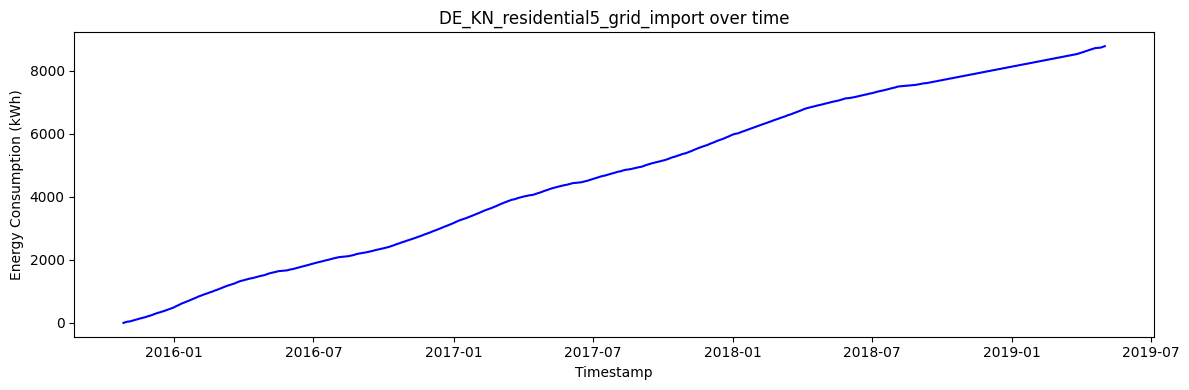

In [24]:
# Example plot
name = "DE_KN_residential5_grid_import"
plt.figure(figsize=(12, 4))
plt.plot(data.index, data[name], color="blue")
plt.title(f"{name} over time")
plt.ylabel("Energy Consumption (kWh)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.savefig("maxwell_over_time")
plt.show()